In [1]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import seaborn as sns


import sys
sys.path.append("C:/Users/Tobias Giesgen/PycharmProjects/gempy")
sys.path.append("../")
import bayseg
import gempy as gp

In [2]:
gempy = pd.read_csv("../bayseg/data_temp/GemPy_BaySeg_temp.csv")
boreholes = ['BH1','BH2','BH3','BH4','BH5']

In [3]:
# Importing the data from CSV-files and setting extent and resolution
geo_data = gp.create_data([0,210,0,210,-210, 0],[30,30,30], 
                          #path_o = "../data/Gempy_Simple_4_layer_90degrees_orientation.csv", # importing orientation (foliation) data
                          path_i = "../bayseg/data_temp/GemPy_BaySeg_temp.csv") # importing point-positional interface data

In [4]:
series = list(gempy.loc[np.where(gempy.borehole == boreholes[0])[0]]
                           .sort_values('Z', ascending = False).formation.values)

In [5]:
# set orientation information
for i in range(len(series)):
    a = np.where(geo_data.get_data('interfaces').formation.values == series[i])[0]
    print(a)
    gp.set_orientation_from_interfaces(geo_data,a)

#geo_data.orientations = np.round(geo_data.orientations,2)
# geo_data.modify_orientation(geo_data.get_data('orientations').dip.values==0, dip = 180)

[5 6 7 8 9]
[15 16 17 18 19]
[10 11 12 13 14]
[0 1 2 3 4]


In [6]:
gp.set_series(geo_data, {"Strat_Series": list(series)},
                      order_series=["Strat_Series"],
                      order_formations=list(series), verbose=0)

In [7]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1], output='geology', compile_theano=True,
                                  dtype='float64', theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0


In [8]:
lith_block, fault_block = gp.compute_model(interp_data)

<IPython.core.display.Javascript object>


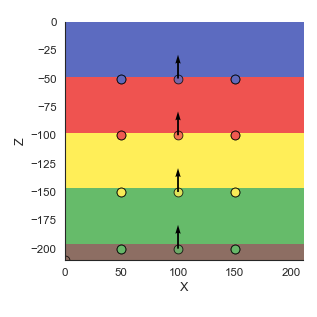

In [9]:
%matplotlib notebook
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=10,  direction='y', plot_data=True)

In [11]:
np.round(lith_block[0],0)

array([5., 5., 4., ..., 1., 1., 1.])

In [13]:
interp_data.interpolator.tg.formation_values.get_value()

array([1., 2., 3., 4., 5.])

In [14]:
interp_data.potential_at_interfaces

array([[38.49980164, 38.81230164, 39.12480164, 39.43730164]])

<IPython.core.display.Javascript object>


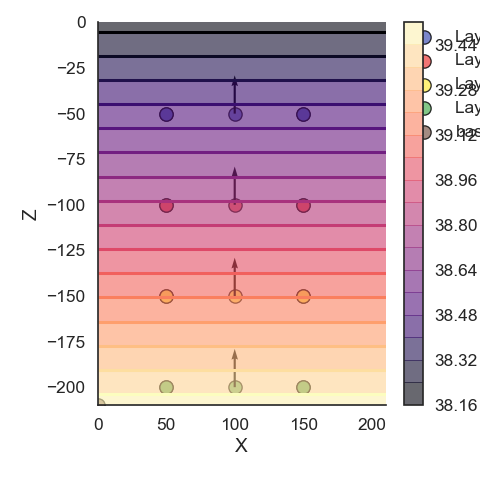

In [16]:
gp.plotting.plot_scalar_field(geo_data, lith_block[1], 25)
plt.colorbar()

In [30]:
geo_data.orientations

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,100.0,100.0,-50.0,1.000000e-07,1.000000e-07,1.0,180.0,0.0,1.0,Layer 4,Strat_Series,1,1,False,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1
1,100.0,100.0,-100.0,1.000000e-07,1.000000e-07,1.0,180.0,0.0,1.0,Layer 1,Strat_Series,2,1,False,"${\bf{x}}_{\beta \,{\bf{2}},0}$",2
2,100.0,100.0,-150.0,1.000000e-07,1.000000e-07,1.0,180.0,0.0,1.0,Layer 2,Strat_Series,3,1,False,"${\bf{x}}_{\beta \,{\bf{3}},0}$",3
3,100.0,100.0,-200.0,1.000000e-07,1.000000e-07,1.0,180.0,0.0,1.0,Layer 3,Strat_Series,4,1,False,"${\bf{x}}_{\beta \,{\bf{4}},0}$",4


In [8]:
ver_s, sim_s = gp.get_surfaces(interp_data, lith_block[1], original_scale=True)

In [10]:
gp.plotting.plot_surfaces_3D_real_time(interp_data, ver_s, sim_s)

TypeError: plot_surfaces_3D_real_time() missing 1 required positional argument: 'simplices_l'

In [ ]:
gp.plotting.plot_surfaces_3D_real_time()

In [84]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"Unknown": ('Layer1','Layer2', 'Layer4', 'Layer3')},
                       order_series = ["Strat_Series"],
                       order_formations=['Layer1','Layer2', 'Layer4', 'Layer3'], verbose=0) 

In [85]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1], output='geology', compile_theano=True,
                                  dtype='float64', theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0


In [86]:
lith_block, fault_block = gp.compute_model(interp_data)

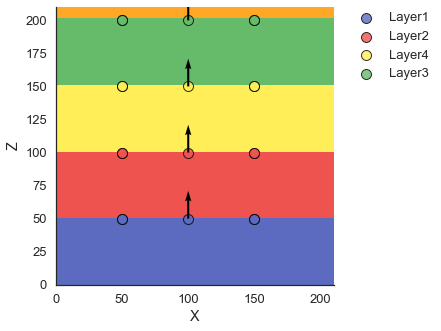

In [87]:
gp.plot_section(geo_data, lith_block[0], cell_number=10,  direction='y', plot_data=True)